In [86]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os,glob
import csv
from PIL import Image
import time
from scipy import ndimage
import scipy
import math
import random
from tqdm import tqdm,trange,tqdm_notebook
import pickle
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D,ZeroPadding2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import ELU
%matplotlib inline
print('libraries loaded!')

libraries loaded!


In [2]:
#Features
X_data=[]
#Steering Values
y_value=[]
#Root Folder for  data
root_data_folder='./data'
#File name for CSV file
CSV_file = 'driving_log.csv'
#Iterating subfolders in root data folder
for item in os.listdir(root_data_folder):
    #Calculating Time
    time_x=time.time()
    if (not os.path.isfile(os.path.join(root_data_folder, item))):
        print('reading data from \t{}'.format(item))
        with open(os.path.join(root_data_folder,item,CSV_file)) as csvfile:    
            reader = csv.reader(csvfile)
            for row in reader:
                #Opening Image
                #Getting Center Image
                file_to_load=row[0]
                if(os.path.isfile(file_to_load)):
                    t_img=Image.open(file_to_load)
                    #Converting into Numpy Array (X,Y,RGB)
                    img_np=np.array(t_img)
                    #Cropping and Resizing
                    img_np=scipy.misc.imresize(img_np[50:120,0:320,:],(100,220,3))
                    #appending image array to the X_data
                    X_data.append(img_np)
                    #Just reading Steering Values from the data
                    y_value.append(np.float32(row[3]))
    #Break Statement for reading single folder
    #break
    print('Time: \t{:.3f}sec'.format(time.time()-time_x))
    
#Converting root arrays into numpy arrays
y_value=np.array(y_value)
X_data=np.array(X_data)

reading data from 	data-1-a
Time: 	39.127sec
reading data from 	data-1-b
Time: 	28.084sec
reading data from 	data-1-c
Time: 	15.931sec
reading data from 	data-1-n
Time: 	24.492sec
reading data from 	data-1-o
Time: 	21.282sec
reading data from 	data-1-r
Time: 	27.939sec
reading data from 	data-1-w
Time: 	25.921sec
reading data from 	data-2-a
Time: 	38.476sec
reading data from 	data-2-b
Time: 	24.440sec
reading data from 	data-2-c
Time: 	75.015sec
reading data from 	data-2-n
Time: 	26.412sec
reading data from 	data-m
Time: 	236.809sec
reading data from 	data_1-n-b
Time: 	0.087sec


Total features/values: 25656/25656
Shape of single feature:	(100, 220, 3)
Shape of features:	(25656, 100, 220, 3)
Shape of labels:	(25656,)


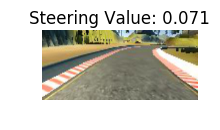

In [97]:
#Data Information

index=random.randint(0,len(X_data))

X_temp_img=X_data[index]

#Display single image from the dataset and its steering value
plt.figure(1,(2,4))
plt.title('Steering Value: {:.3f}'.format(y_value[index]))
plt.imshow(X_temp_img)
plt.axis('off')

print('Total features/values: {}/{}'.format(len(X_data),len(y_value)))
print('Shape of single feature:\t{}'.format(X_temp_img.shape))
print('Shape of features:\t{}'.format(X_data.shape))
print('Shape of labels:\t{}'.format(y_value.shape))



Examples data: Left: 9492, Straight 11243, Right 4921


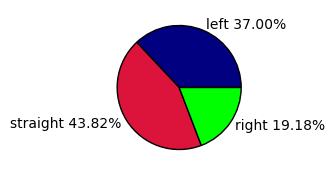

In [98]:
#Data Description
#Calculating total steering direction in the dataset.
left_steer=0
right_steer=0
straight_steer=0
total_steer=0
for y in y_value:
    if(y==0):
        straight_steer+=1
    elif(y>0):
        right_steer+=1
    else:
        left_steer+=1
total_steer=straight_steer+right_steer+left_steer
print('Examples data: Left: {}, Straight {}, Right {}'.format(left_steer,straight_steer,right_steer))
plt.figure(1,(2,2))
plt.pie([left_steer,straight_steer,right_steer],colors=['navy','crimson','lime'],labels=['left {:.2f}%'.format(left_steer/total_steer*100),'straight {:.2f}%'.format(straight_steer/total_steer*100),'right {:.2f}%'.format(right_steer/total_steer*100)])
plt.show()

**Hyper Parameters:**

In [69]:
model_name='auto_model_10.h5'
#HYPER PARAMETERS
input_shape=X_data[0].shape
learning_rate=0.0001
no_of_epoch=20
batch_size=360
print('shape of image: {}'.format(input_shape))

shape of image: (100, 220, 3)


**Loading model from model.py** 


In [76]:
import model as md
#Default parameter (inputshape is set for this project, modify according to your need)
model = md.create_model()
model.summary()
#compiling model with Adam optimizer (learning rate=0.0001) and calculating loss using mean squared error
model.compile(optimizer=Adam(learning_rate), loss="mse" )

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_12 (Lambda)               (None, 100, 220, 3)   0           lambda_input_12[0][0]            
____________________________________________________________________________________________________
convolution2d_48 (Convolution2D) (None, 50, 110, 24)   1824        lambda_12[0][0]                  
____________________________________________________________________________________________________
elu_33 (ELU)                     (None, 50, 110, 24)   0           convolution2d_48[0][0]           
____________________________________________________________________________________________________
maxpooling2d_36 (MaxPooling2D)   (None, 49, 109, 24)   0           elu_33[0][0]                     
___________________________________________________________________________________________

***Training Model:***


In [73]:
history=model.fit(X_data,y_value, nb_epoch=no_of_epoch, batch_size=batch_size, verbose=1,shuffle=True,validation_split=0.20)

Train on 20524 samples, validate on 5132 samples
Epoch 1/20
20524/20524 [==============================] - 349s - loss: 0.0282 - val_loss: 0.0136
Epoch 2/20
20524/20524 [==============================] - 332s - loss: 0.0151 - val_loss: 0.0131
Epoch 3/20
20524/20524 [==============================] - 328s - loss: 0.0134 - val_loss: 0.0130
Epoch 4/20
20524/20524 [==============================] - 328s - loss: 0.0126 - val_loss: 0.0127
Epoch 5/20
20524/20524 [==============================] - 324s - loss: 0.0118 - val_loss: 0.0170
Epoch 6/20
20524/20524 [==============================] - 325s - loss: 0.0117 - val_loss: 0.0158
Epoch 7/20
20524/20524 [==============================] - 324s - loss: 0.0119 - val_loss: 0.0200
Epoch 8/20
20524/20524 [==============================] - 324s - loss: 0.0111 - val_loss: 0.0144
Epoch 9/20
20524/20524 [==============================] - 326s - loss: 0.0104 - val_loss: 0.0142
Epoch 10/20
20524/20524 [==============================] - 325s - loss: 0.0100

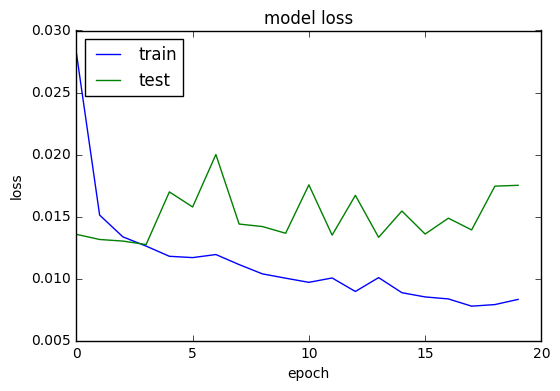

In [101]:
# list all data from model training history
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [75]:
#Saving Model, Override if any file exisit with same name
model.save(model_name,overwrite=True)

In [ ]:
#Load model again in other variable, and test whether it is working or not!
#This is just for testing 

In [104]:
from keras.models import load_model
modelnew=load_model(model_name)

Actual (A), Predicting (P) Values


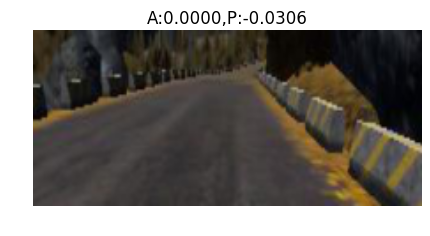

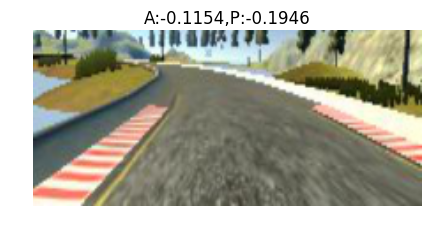

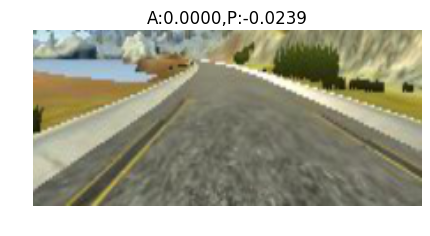

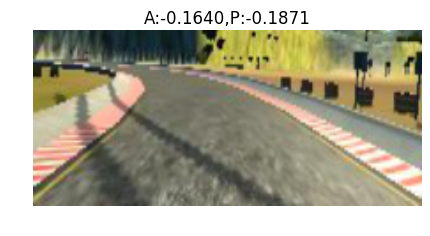

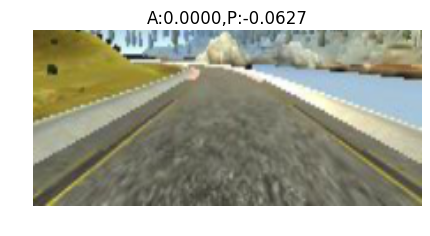

In [108]:
#Testing few images manually with their actual values and the predicting values
print ("Actual (A), Predicting (P) Values")
for i in range(5):    
    rIndex = random.randint(i,len(X_data))
    testing_img=X_data[rIndex].reshape(1,100, 220, 3)
    plt.figure(i,(5,5))
    plt.title('A:{:.4f},P:{:.4f}'.format(y_value[rIndex], modelnew.predict(testing_img)[0][0]))
    plt.axis('off')
    plt.imshow(X_data[rIndex])